In [2]:
import math
import numpy as np
import pandas as pd
import networkx as nx
from collections import deque
import matplotlib.pyplot as plt
import random
import statistics

In [3]:
n = 15
mygraph = nx.erdos_renyi_graph(n, .33)
nodes = list(mygraph.nodes())
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


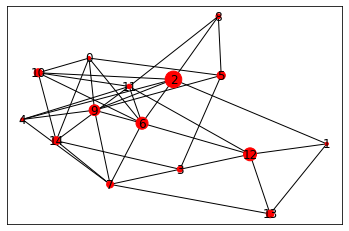

In [ ]:
BC = nx.betweenness_centrality(mygraph)
graph_states = {i: 0 for i in range(2, n)}
graph_states.update({1:1, 0:1})
PC = nx.percolation_centrality(mygraph, states = graph_states)
draw_node_size = [(value+.01) * 1000 for value in list(PC.values())]
layout = nx.spring_layout(mygraph)
nx.draw_networkx(mygraph,node_size=draw_node_size, node_color='r', node_shape='o', pos = layout, label = nodes, with_labels=True)

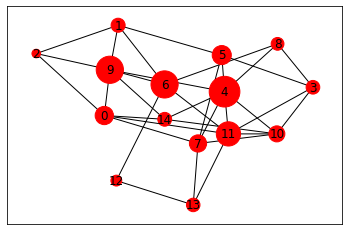

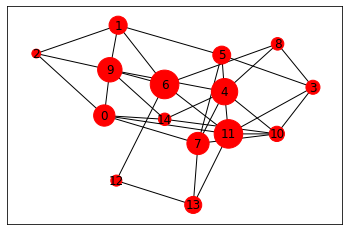

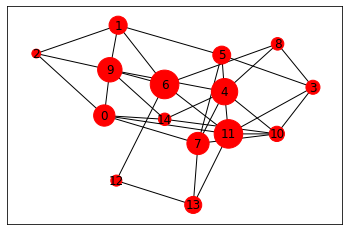

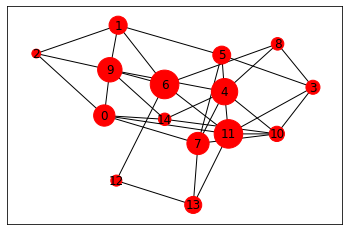

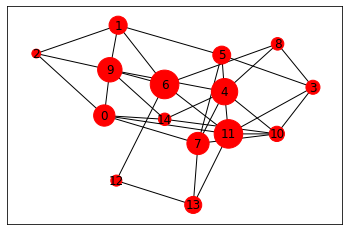

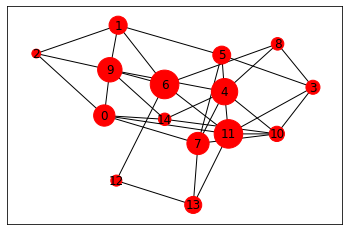

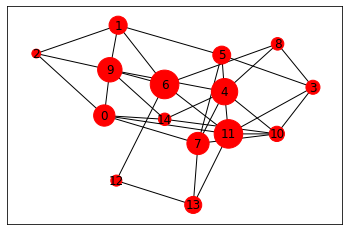

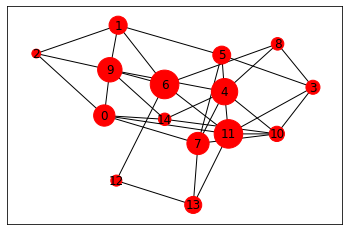

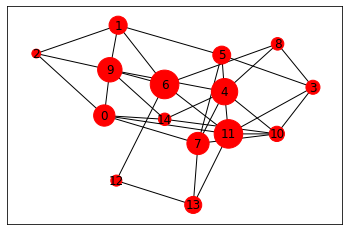

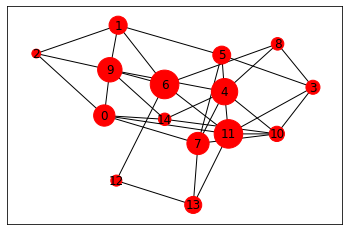

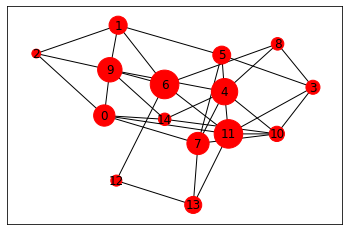

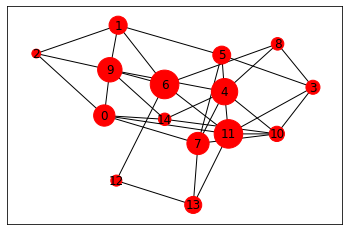

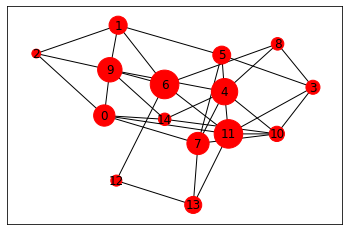

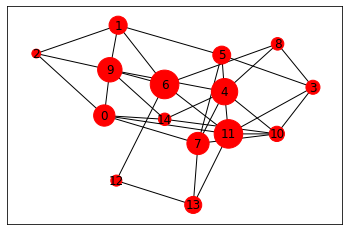

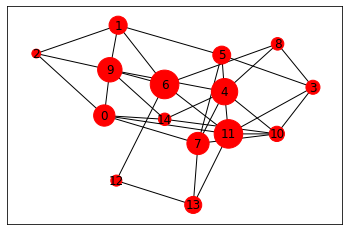

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1}


In [4]:
### percolation process to alter the states at timesteps ###
graph_states = {i: 0 for i in range(n)}
graph_states.update({1:1, 8:1})
PC = nx.percolation_centrality(mygraph, states = graph_states)
layout = nx.spring_layout(mygraph)

perc_prob = .2
superspreader_prob = .5
superspreaders = [3,0,5]
for timestep in range(300):
    for node in nodes:
        neighbs = mygraph.adj[node]
        for neighbor in neighbs:
            if graph_states[neighbor] == 1:
                random_var = random.uniform(0, 1)
                if neighbor in superspreaders:
                    if random_var < superspreader_prob:
                        graph_states[node] =1
                else:
                    if random_var < perc_prob:
                        graph_states[node] = 1
    if timestep % 20 == 0:
        PC = nx.percolation_centrality(mygraph, states = graph_states)
        draw_node_size = [(value+.01) * 5000 for value in list(PC.values())]
        nx.draw_networkx(mygraph,node_size=draw_node_size, node_color='r', node_shape='o', pos = layout, label = nodes, with_labels=True)
        plt.show()       
                  
                        
print(graph_states)

In [5]:
### 8 NODE GRAPH GIVEN BY THE PAPER REVISUALIZED (page 6) ### 
nodes = np.arange(1,9,1)
edges = [(1,4), (2,4), (3,4), (4,5), (5,6), (6,8),(6,7)]
G1 = nx.Graph()
G1.add_nodes_from(nodes)
G1.add_edges_from(edges)

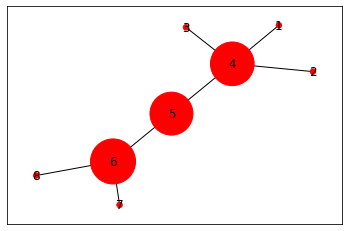

In [6]:
graph_states = {1: .1, 2:.2,  3:.2, 4:.2, 5:.3, 6:.2, 7:.5, 8:.5}
PC = nx.percolation_centrality(G1, states = graph_states)
draw_node_size = [(value+.01) * 3000 for value in list(PC.values())]
layout = nx.spring_layout(G1)
nx.draw_networkx(G1,node_size=draw_node_size, node_color='r', node_shape='o', pos = layout, label = nodes, with_labels=True)

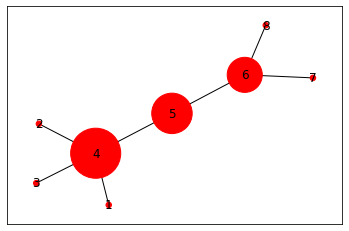

In [7]:
graph_states.update({1:.3, 2:.5, 3:.5, 8:.1, 7:.1})
PC = nx.percolation_centrality(G1, states = graph_states)
draw_node_size = [(value+.01) * 3000 for value in list(PC.values())]
layout = nx.spring_layout(G1)
nx.draw_networkx(G1,node_size=draw_node_size, node_color='r', node_shape='o', pos = layout, label = nodes, with_labels=True)

In [8]:
### ALBERTA CA GONNORHEA GRAPH STUDY ###
edges = [(61,60), (60,59), (59,112), (59,11), (11,47), (47,48), (11,44), (11,12), (12,95), (12,110), (12,153), (12,13), (12,58), (13,20), (20,19), (12,14), (44,26), (26,38), (38,37), (26,57), (26,16), (14,16), (16,154), (16,15), (26,140), (14,80), (80,75), (140,75), (75,89), (75,76), (75,85), (75,43), (43,42), (75,7), (7,141), (7,108), (7,8), (7,33), (33,34), (33,49)]
nodes = [node[0] for node in edges] + [node[1] for node in edges]
nodes = list(set(nodes))

G2 = nx.Graph()
G2.add_nodes_from(nodes)
G2.add_edges_from(edges)

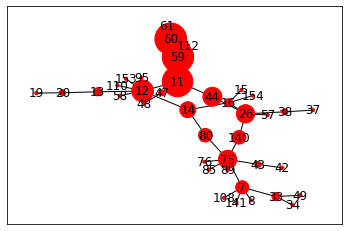

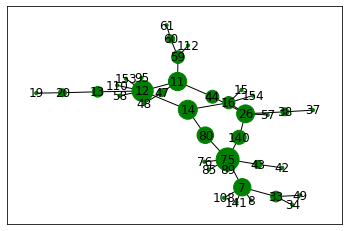

In [35]:
### comparing BC to PC of Alberta graph ###
graph_states = {i: .0001 for i in nodes}
graph_states.update({61:1})
PC = nx.percolation_centrality(G2, states = graph_states)
BC = nx.betweenness_centrality(G2)
draw_node_size = [(value+.01) * 1000 for value in list(PC.values())]
draw_node_sizeBC = [(value+.01) * 1000 for value in list(BC.values())]
layout = nx.spring_layout(G2)
nx.draw_networkx(G2,node_size=draw_node_size, node_color='r', node_shape='o', pos = layout, label = nodes, with_labels=True)
plt.show()
nx.draw_networkx(G2,node_size=draw_node_sizeBC, node_color='g', node_shape='o', pos = layout, label = nodes, with_labels=True)
plt.show()

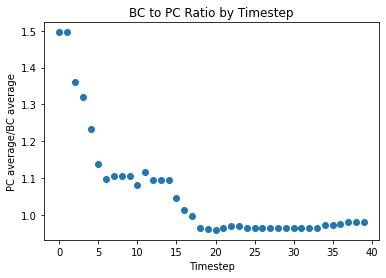

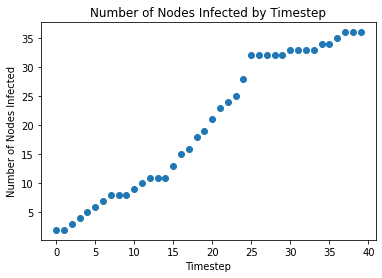

In [32]:
### PC to BC Ratio by timestep of Percolation : Alberta Graph ###
perc_prob = .2
ratios = []
num_infected = []
curr_infected = 1
graph_states = {i: .0001 for i in nodes}
graph_states.update({61:1})
old_states = graph_states.copy()

timesteps = 40
for timestep in range(timesteps):
    for node in nodes:
        neighbs = G2.adj[node]
        for neighbor in neighbs:
            if old_states[neighbor] == 1:
                random_var = random.uniform(0, 1)
                if random_var < perc_prob:
                  if graph_states[node] != 1:
                    graph_states[node] = 1
                    curr_infected = curr_infected + 1
    old_states = graph_states.copy()

    PC = nx.percolation_centrality(G2, states = graph_states)
    BC = nx.betweenness_centrality(G2)
    BC_avg = 0
    PC_avg = 0
    counter = 0
    for node in nodes:
      if BC[node] > 0:
        BC_avg += BC[node]
        PC_avg += PC[node]
        counter += 1
    BC_avg = float(BC_avg / counter)
    PC_avg = float(PC_avg / counter)
    ratios.append(float(PC_avg/BC_avg))
    num_infected.append(curr_infected)

plt.scatter(np.arange(0,timesteps,1), ratios)
plt.title("BC to PC Ratio by Timestep")
plt.xlabel("Timestep")
plt.ylabel("PC average/BC average")
plt.show()
#print(num_infected)
plt.scatter(np.arange(0, timesteps, 1), num_infected)
plt.title("Number of Nodes Infected by Timestep")
plt.xlabel("Timestep")
plt.ylabel("Number of Nodes Infected")
plt.show()

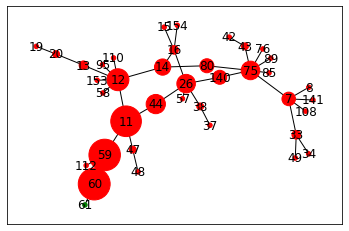

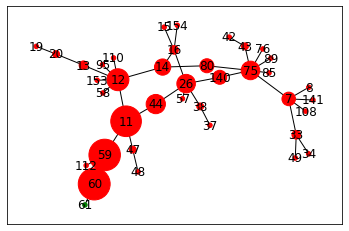

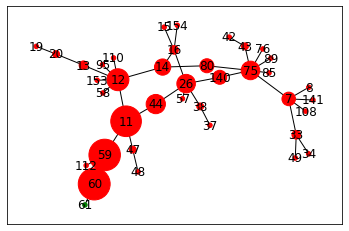

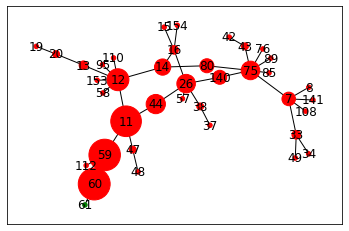

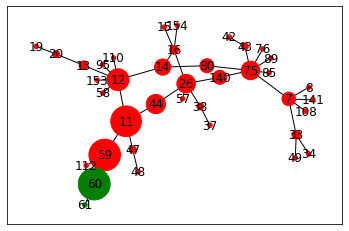

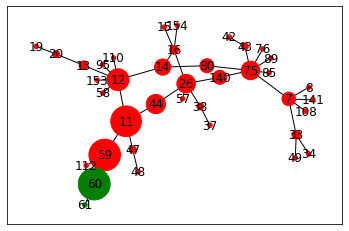

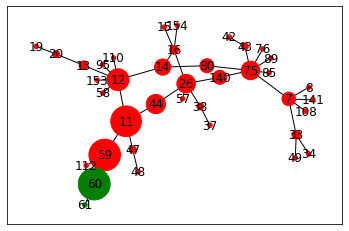

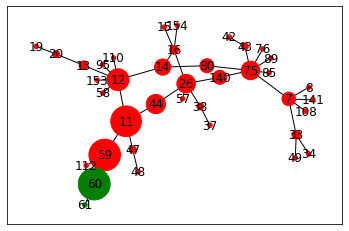

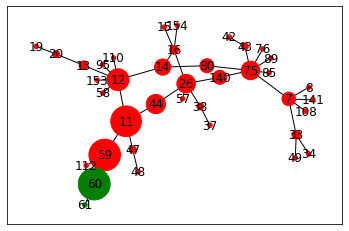

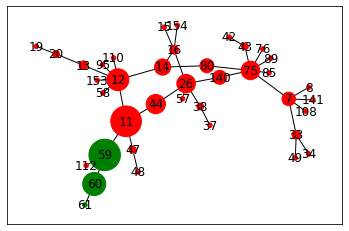

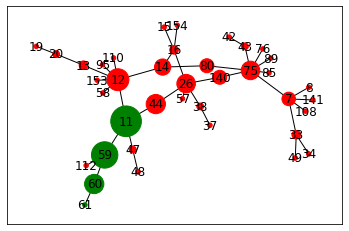

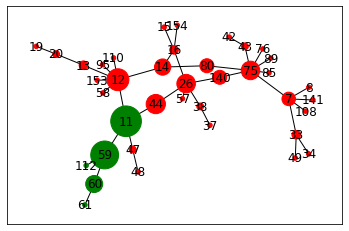

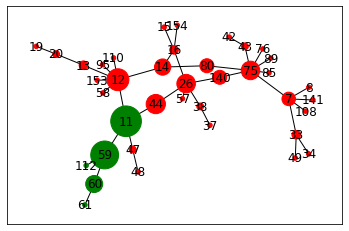

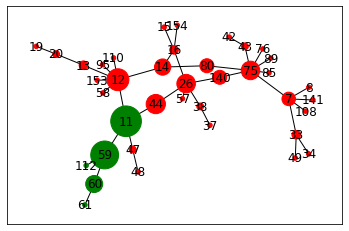

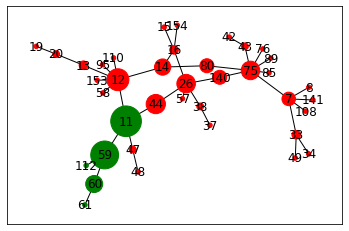

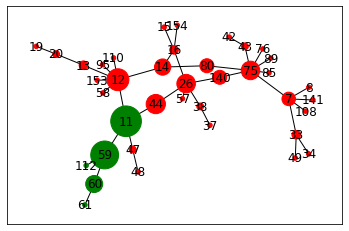

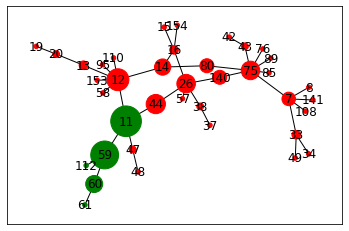

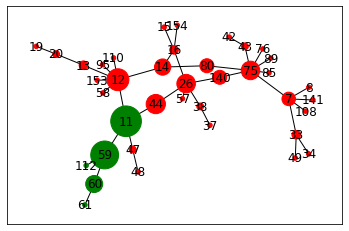

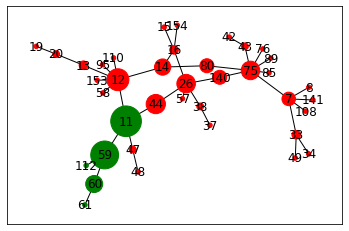

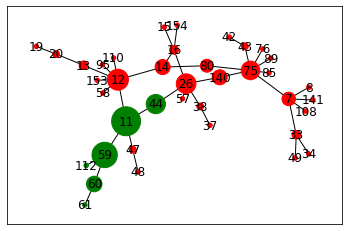

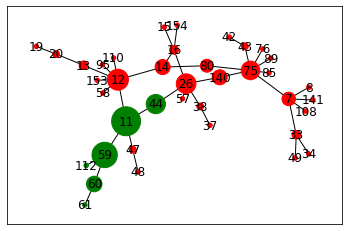

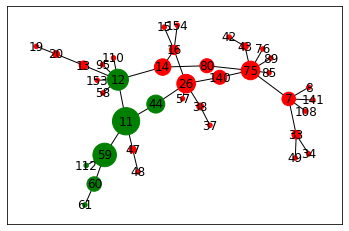

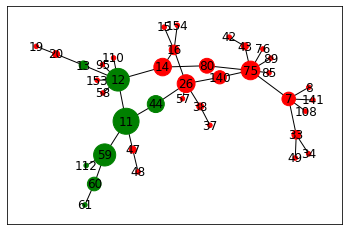

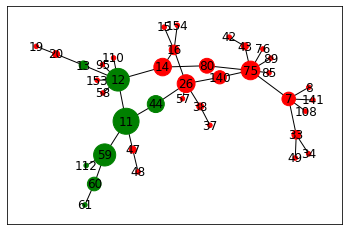

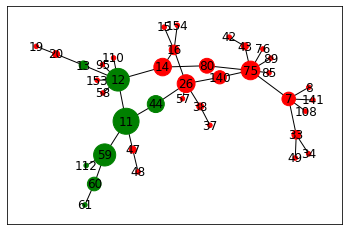

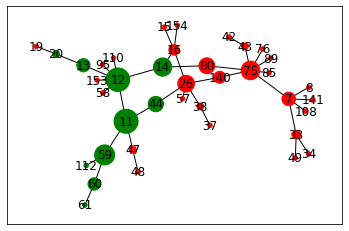

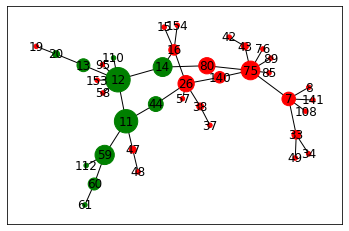

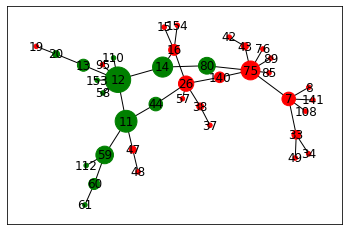

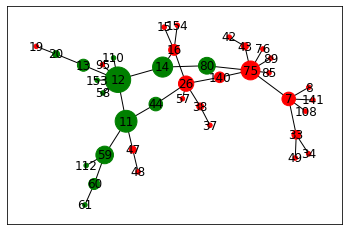

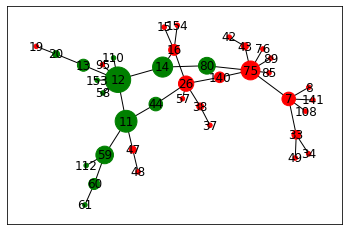

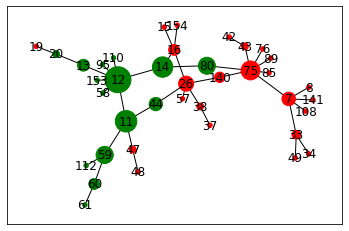

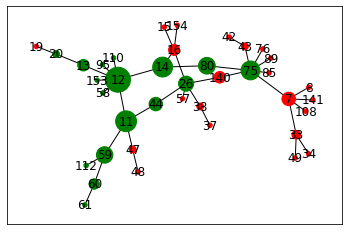

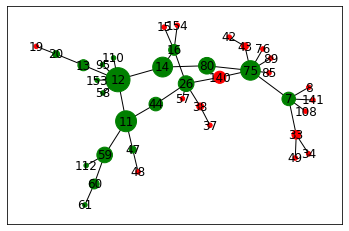

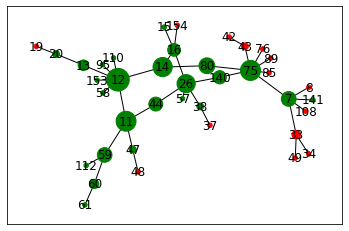

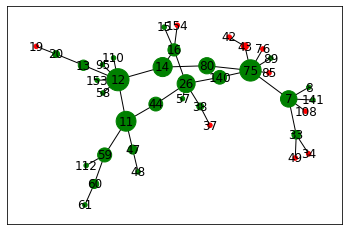

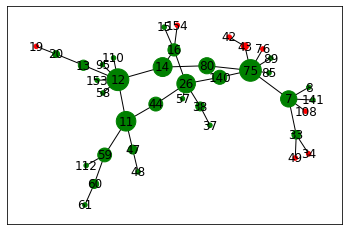

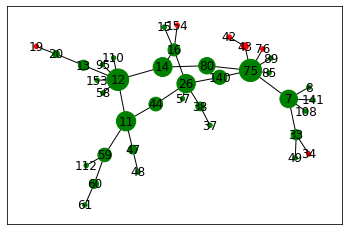

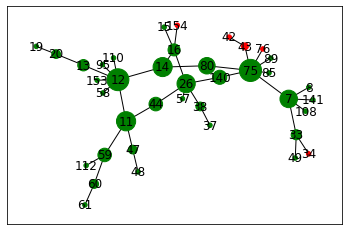

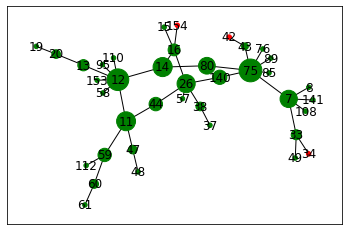

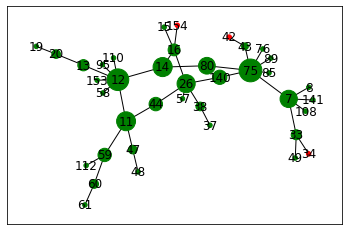

In [98]:
### Infection outlook of Alberta graph using assymetric percolation probabilities ###
#layout = nx.spring_layout(G2)
colors = {i: "red" for i in nodes}
colors.update({61: "green"})

perc_probs = {i: .2 for i in nodes}
perc_probs.update({7: .5, 140:.5, 26:.5})
ratios = []
num_infected = []
curr_infected = 1
graph_states = {i: .0001 for i in nodes}
graph_states.update({61:1})
old_states = graph_states.copy()

timesteps = 40
for timestep in range(timesteps):
    for node in nodes:
        neighbs = G2.adj[node]
        for neighbor in neighbs:
            if old_states[neighbor] == 1:
                random_var = random.uniform(0, 1)
                if random_var < perc_probs[neighbor]:
                  if graph_states[node] != 1:
                    graph_states[node] = 1
                    colors.update({node: "green"})
                    curr_infected = curr_infected + 1
    old_states = graph_states.copy()

    PC = nx.percolation_centrality(G2, states = graph_states)
    BC = nx.betweenness_centrality(G2)
    BC_avg = 0
    PC_avg = 0
    counter = 0
    for node in nodes:
      if BC[node] > 0:
        BC_avg += BC[node]
        PC_avg += PC[node]
        counter += 1

    if timestep % 1 == 0:
      draw_node_size = [(value+.02) * 1000 for value in list(PC.values())]
      draw_node_sizeBC = [(value+.02) * 1000 for value in list(BC.values())]
      color_array = [colors[i] for i in nodes]
      nx.draw_networkx(G2,node_size=draw_node_size, node_color=color_array, node_shape='o', pos = layout, label = nodes, with_labels=True)
      plt.show()



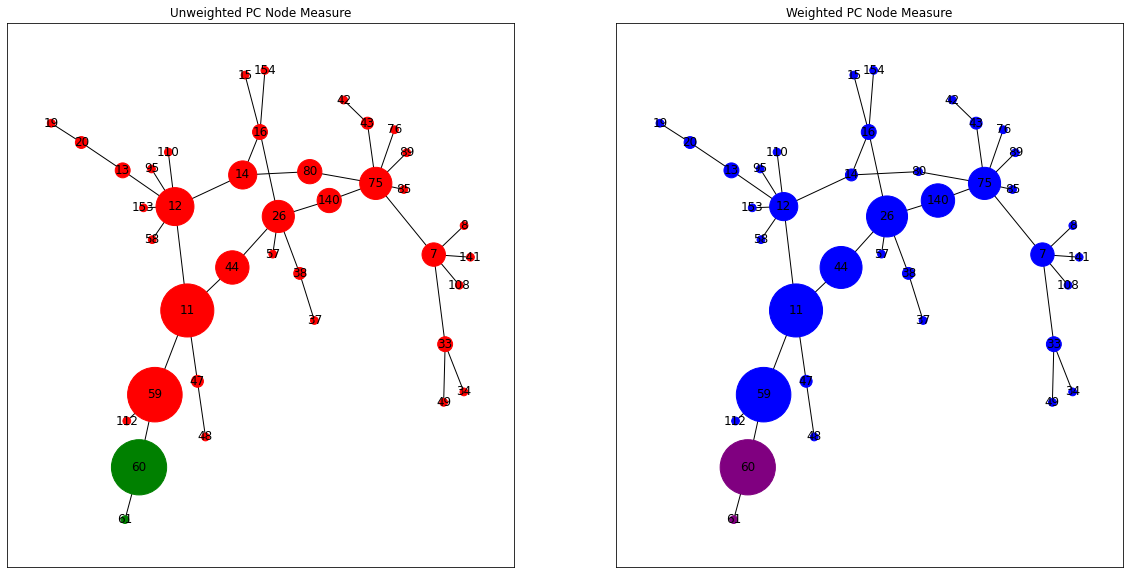

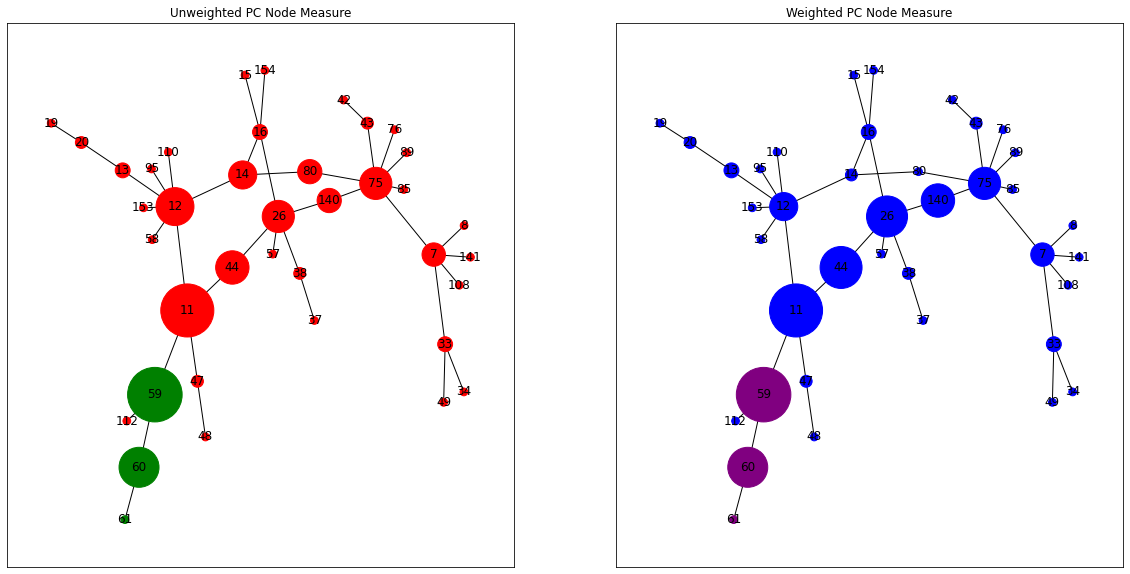

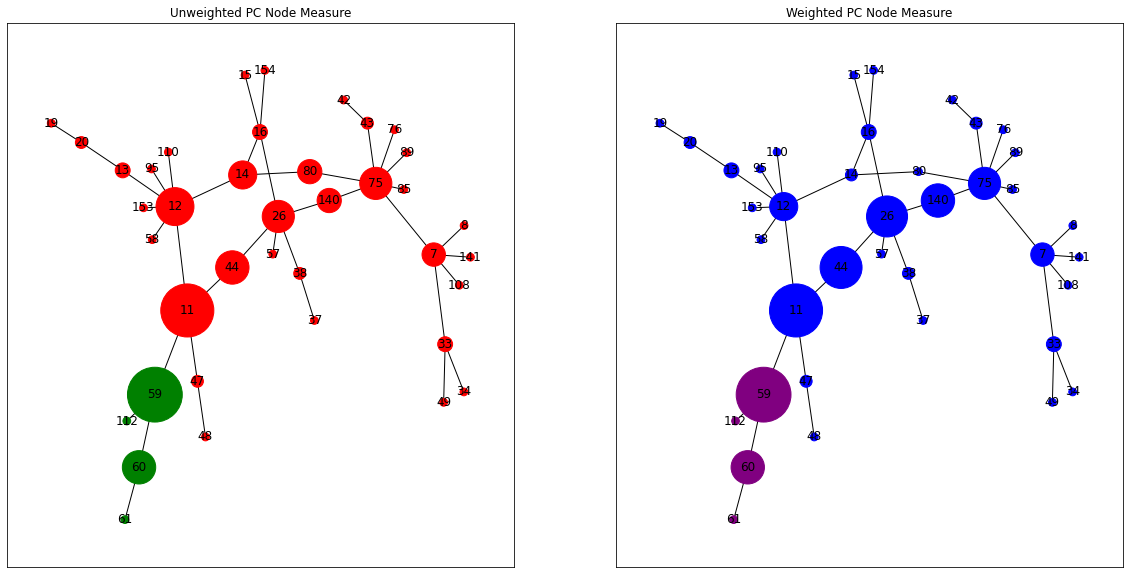

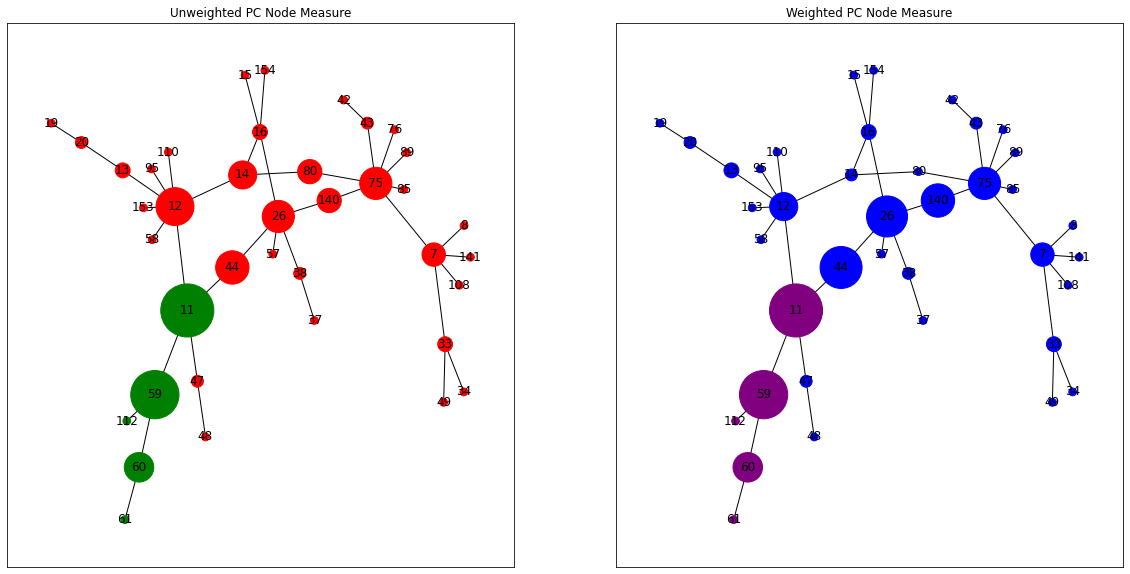

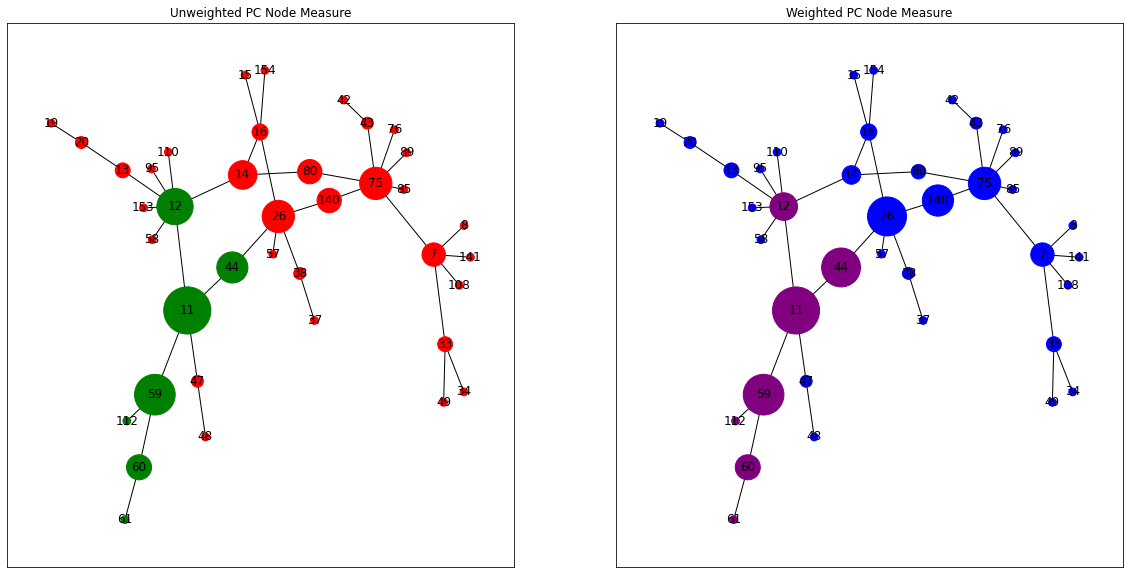

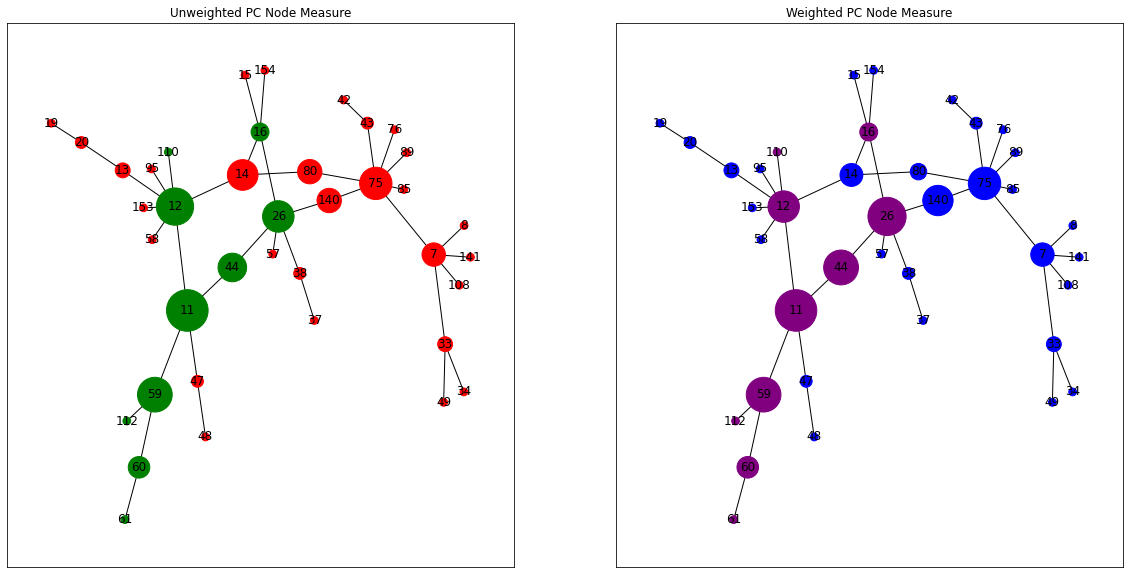

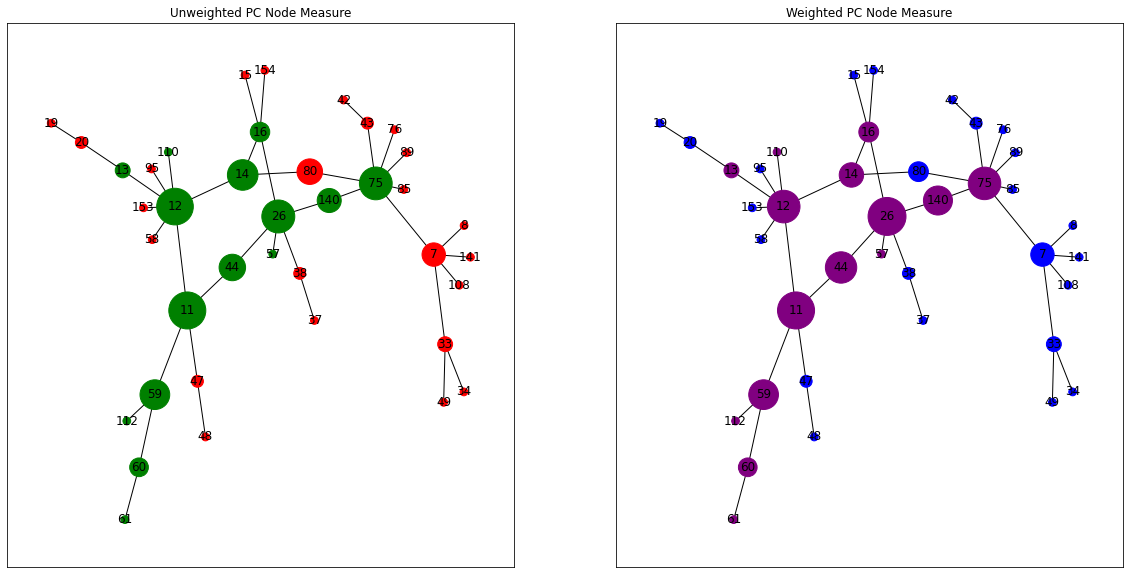

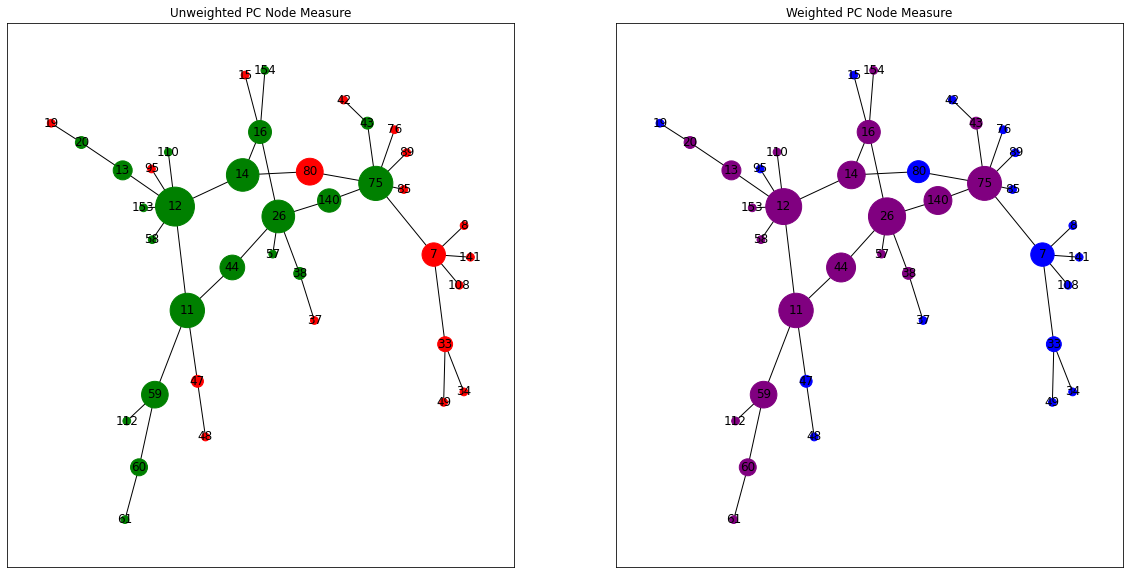

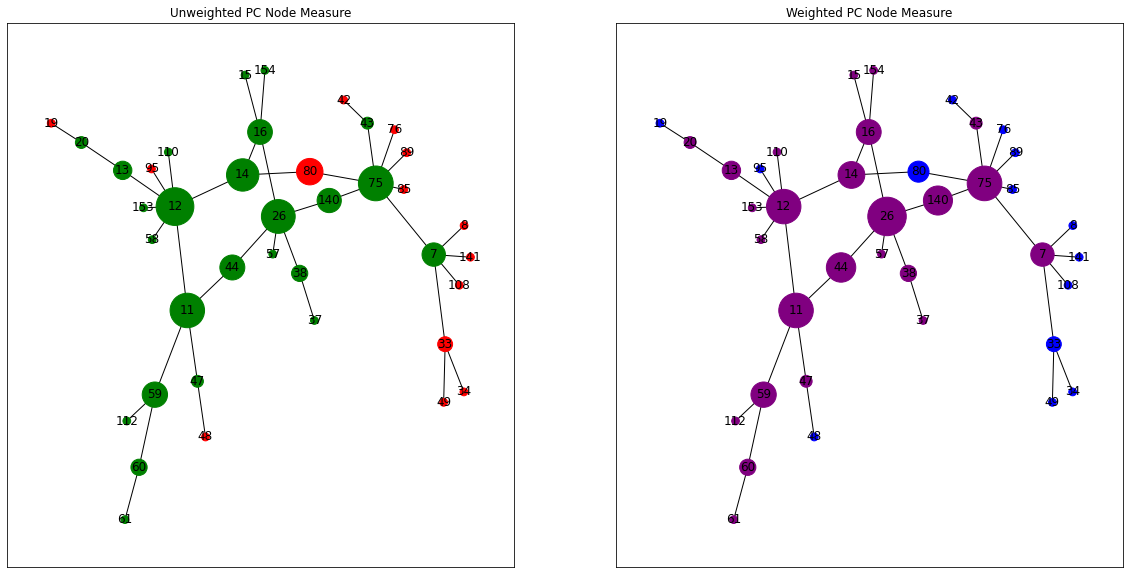

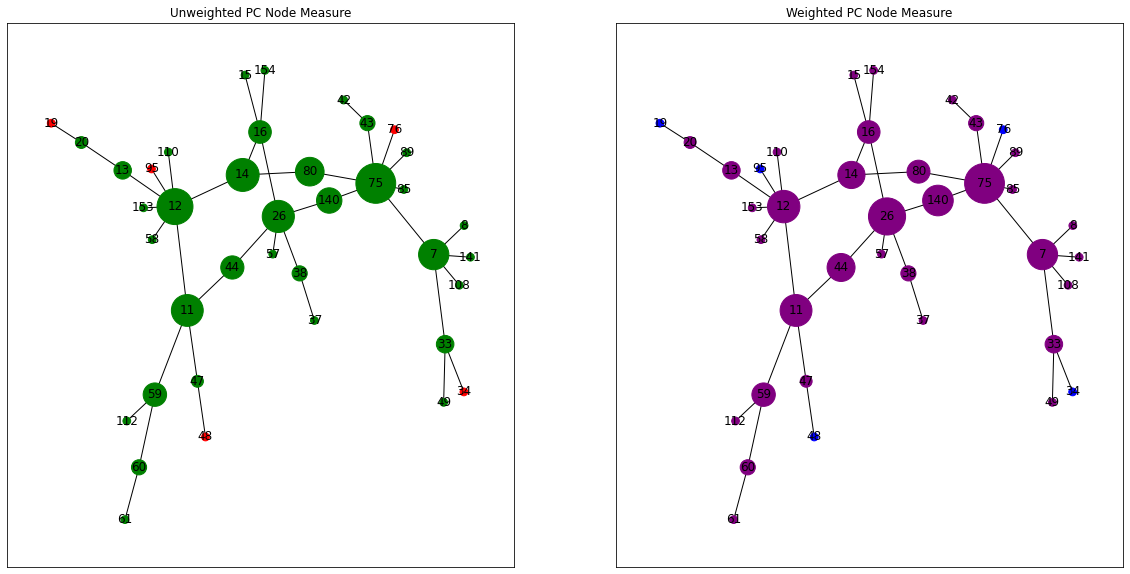

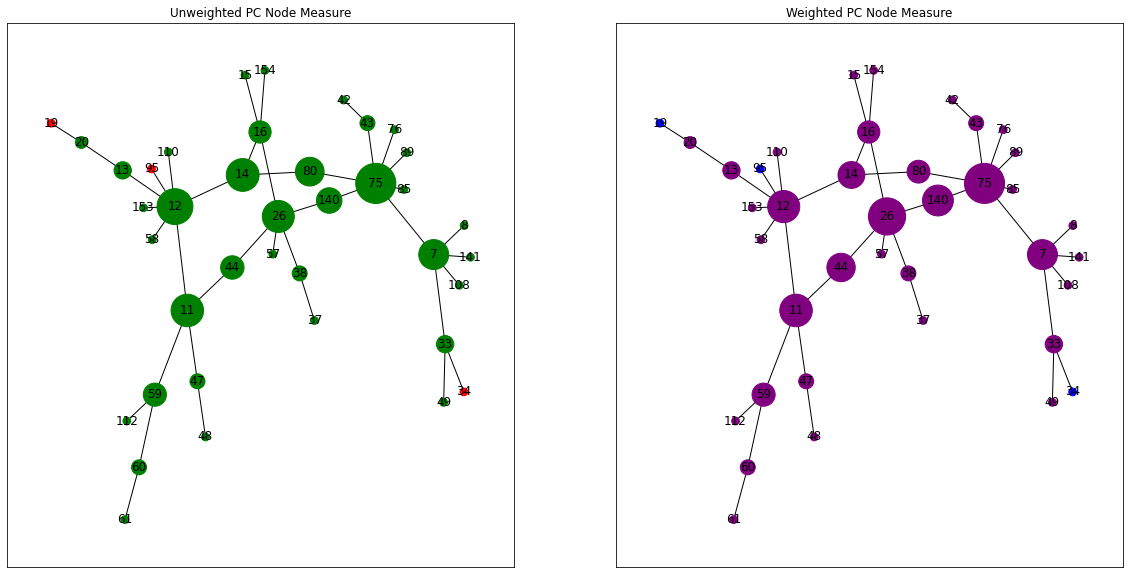

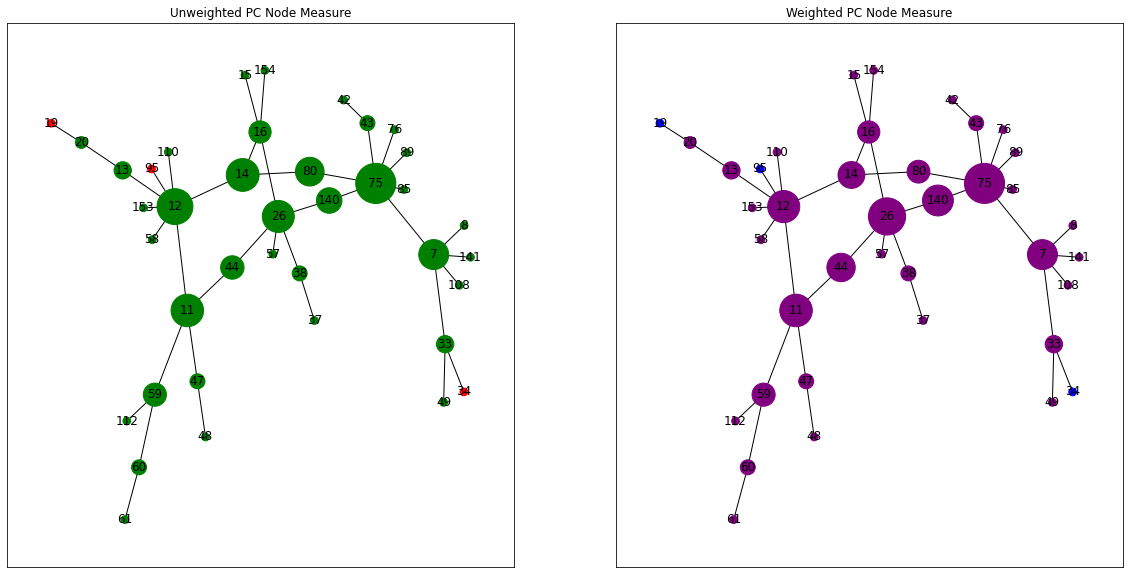

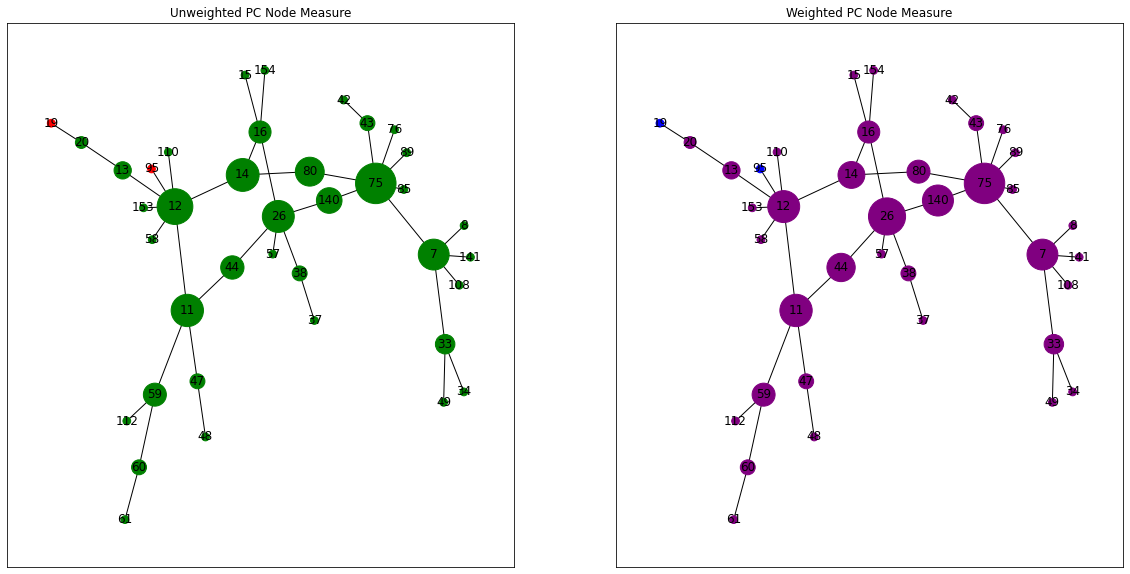

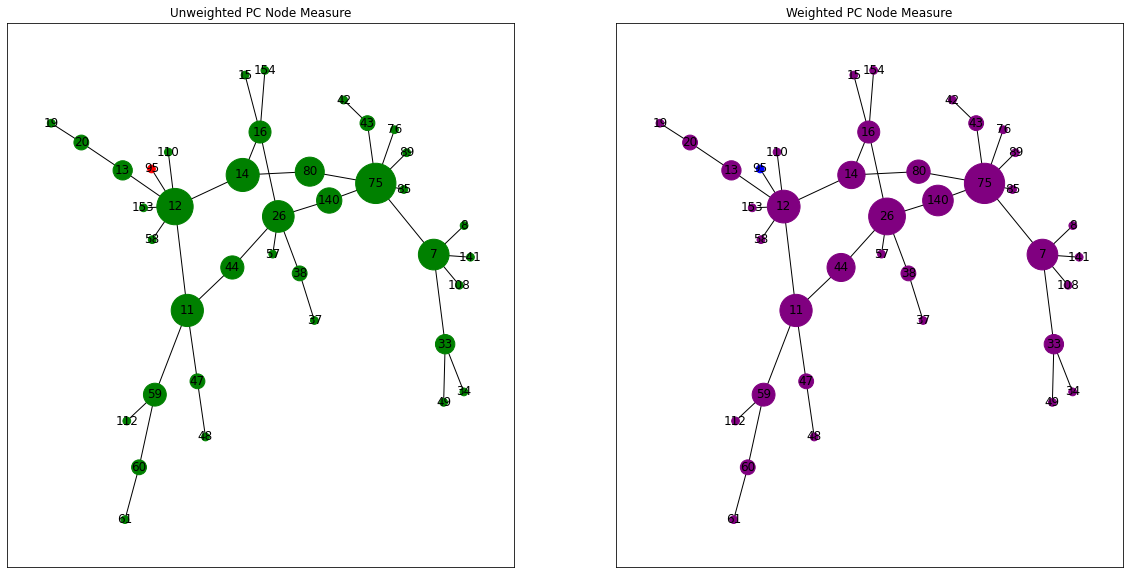

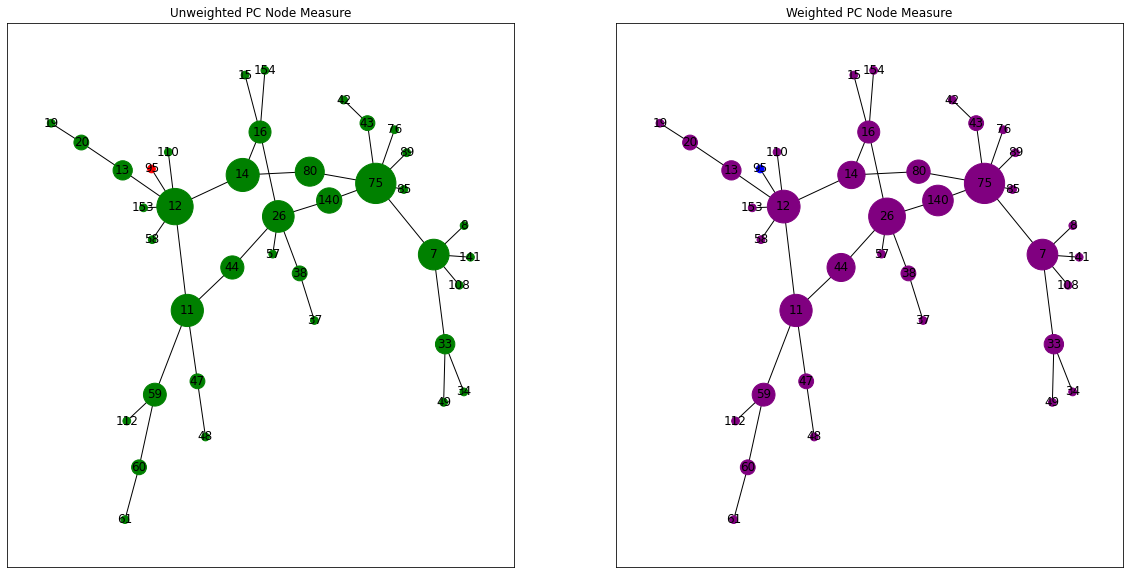

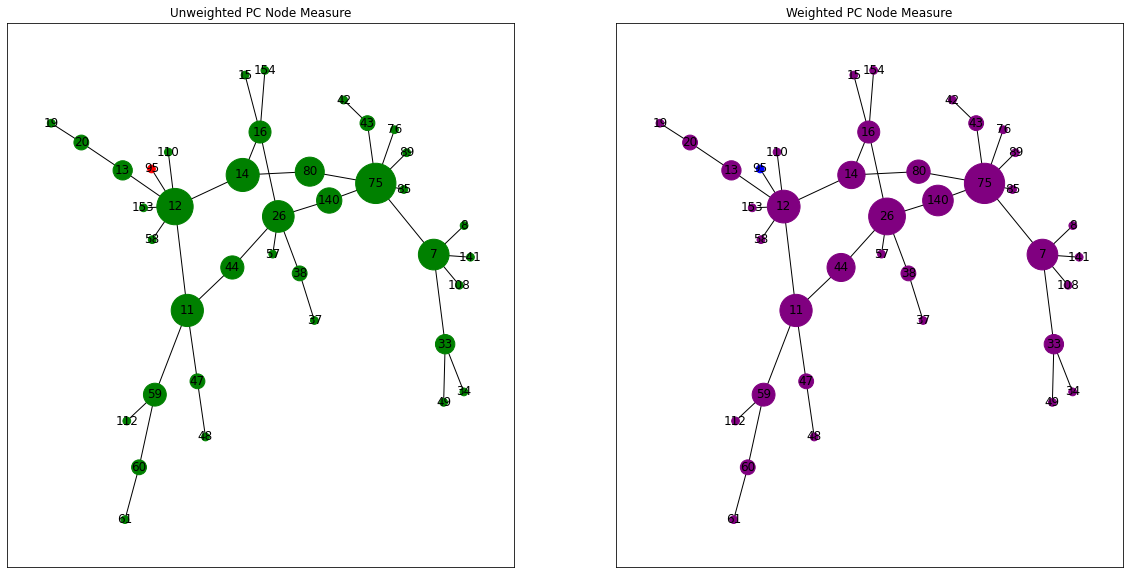

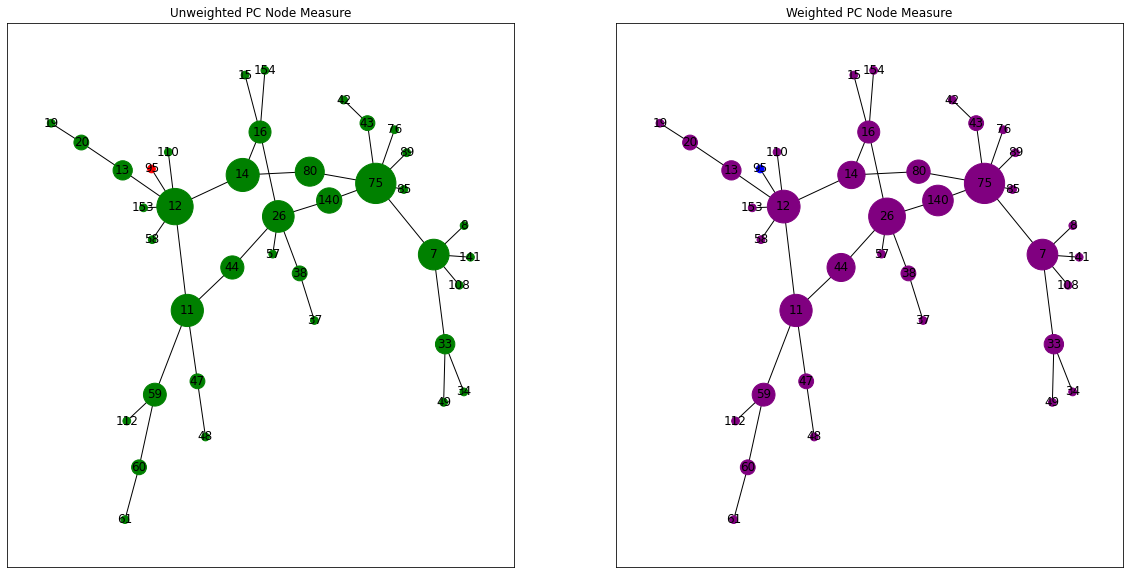

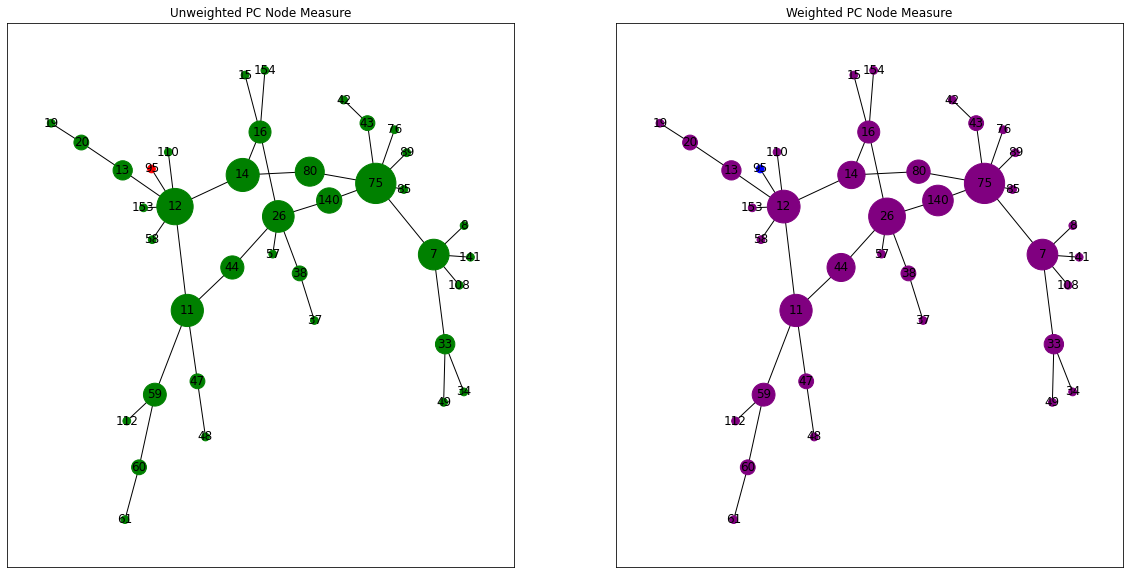

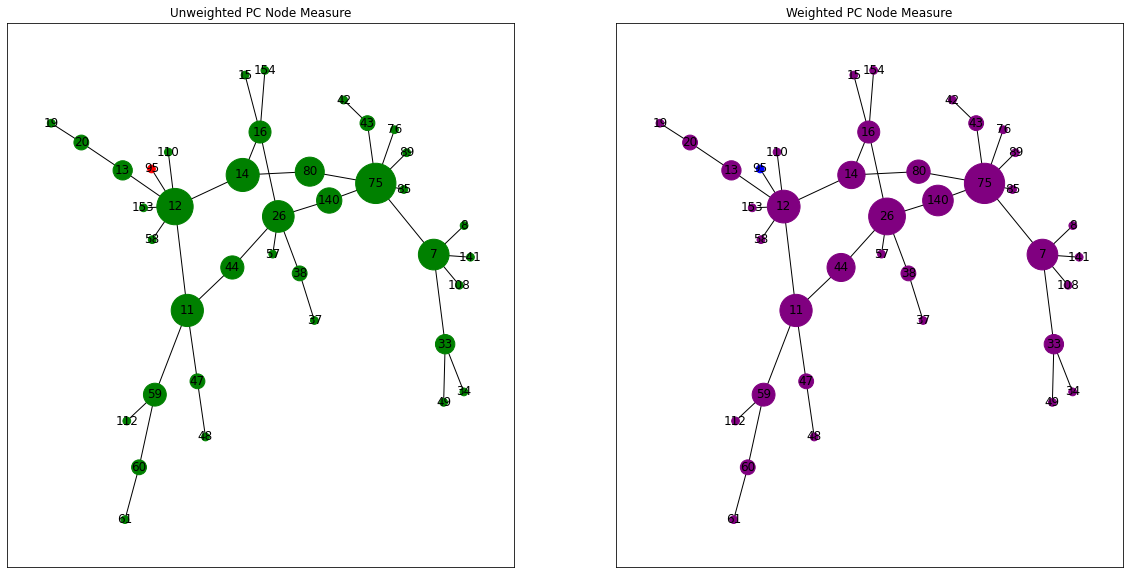

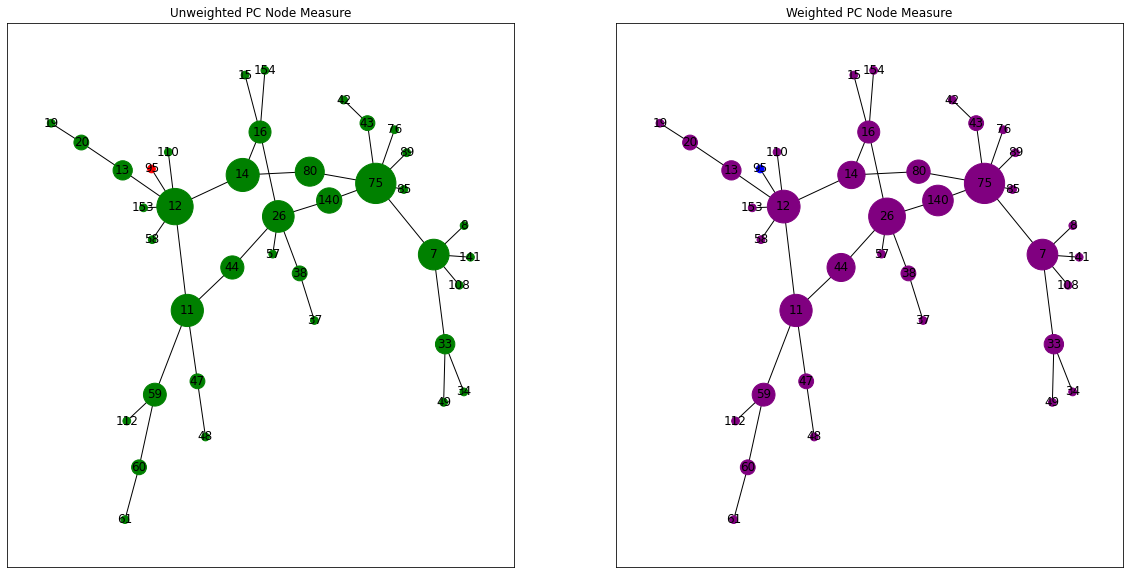

In [99]:
### PC Measure as Compared to Weighted PC Measure by percolation probs ###
edges = G2.edges()
weights = {}
for edge in edges:
  max_perc = max(perc_probs[edge[0]], perc_probs[edge[1]])
  weights.update({edge: float(1/max_perc)})

nx.set_edge_attributes(G2, weights, name="edge_weights")

#run iterations of percolation
colors = {i: "red" for i in nodes}
colors.update({61: "green"})
colors_w = {i: "blue" for i in nodes}
colors_w.update({61: "purple"})

ratios_P = []
ratios_B = []
num_infected = []
curr_infected = 1
graph_states = {i: .0001 for i in nodes}
graph_states.update({61:1})
old_states = graph_states.copy()

timesteps = 40
for timestep in range(timesteps):
    for node in nodes:
        neighbs = G2.adj[node]
        for neighbor in neighbs:
            if old_states[neighbor] == 1:
                random_var = random.uniform(0, 1)
                if random_var < perc_probs[neighbor]:
                  if graph_states[node] != 1:
                    graph_states[node] = 1
                    colors.update({node: "green"})
                    colors_w.update({node: "purple"})
                    curr_infected = curr_infected + 1
    old_states = graph_states.copy()

    PC = nx.percolation_centrality(G2, states = graph_states)
    PC_weighted = nx.percolation_centrality(G2, states = graph_states, weight = "edge_weights")
    BC = nx.betweenness_centrality(G2, weight = "edge_weights")

    ratio_PC = 0
    ratio_BC = 0
    counter_P = 0
    counter_B = 0
    for node in nodes:
      if BC[node] > 0:
        ratio_BC += PC_weighted[node] / BC[node]
        #PC_weight_avg += PC_weighted[node]
        #PC_avg += PC[node]
        counter_B += 1

      if PC[node] > 0:
        ratio_PC += PC_weighted[node] / PC[node]
        #PC_weight_avg += PC_weighted[node]
        #PC_avg += PC[node]
        counter_P += 1
    #PC_weighted_avg = float(PC_weight_avg / counter)
    #PC_avg = float(PC_avg / counter)
    ratios_P.append(float(ratio_PC/counter_P))
    ratios_B.append(float(ratio_BC/counter_B))

    if timestep % 2 == 0:
      draw_node_size = [(value+.02) * 3000 for value in list(PC.values())]
      draw_node_size_weighted = [(value+.02) * 3000 for value in list(PC_weighted.values())]
      color_array = [colors[i] for i in nodes]
      color_w_array = [colors_w[i] for i in nodes]
      ## PC Graph
      fig = plt.figure(figsize=(20, 10))
      plt.subplot(1, 2, 1)
      nx.draw_networkx(G2,node_size=draw_node_size,  node_color=color_array, node_shape='o', pos = layout, label = nodes, with_labels=True)
      plt.title("Unweighted PC Node Measure")
      ## weighted PC Graph
      plt.subplot(1,2,2)
      nx.draw_networkx(G2,node_size=draw_node_size_weighted, node_color=color_w_array, node_shape='o', pos = layout, label = nodes, with_labels=True)
      plt.title("Weighted PC Node Measure")
      plt.show()

    



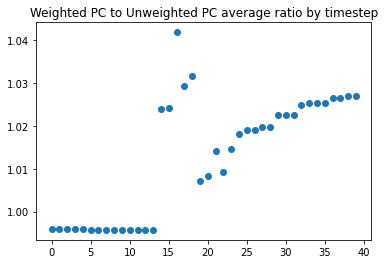

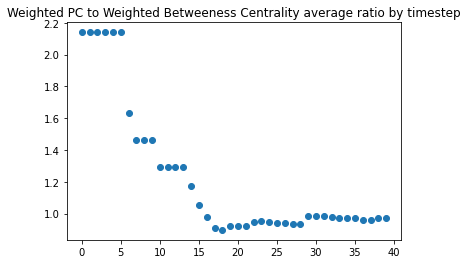

In [94]:
## plot ratio of weighted PC to unweighted PC // plot ratio of weighted BC with weighted PC ##
plt.scatter(np.arange(0,timesteps, 1), ratios_P)
plt.title("Weighted PC to Unweighted PC average ratio by timestep")
plt.show() 

plt.scatter(np.arange(0,timesteps, 1), ratios_B)
plt.title("Weighted PC to Weighted Betweeness Centrality average ratio by timestep")
plt.show() 